[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Accuracy: 95.00%


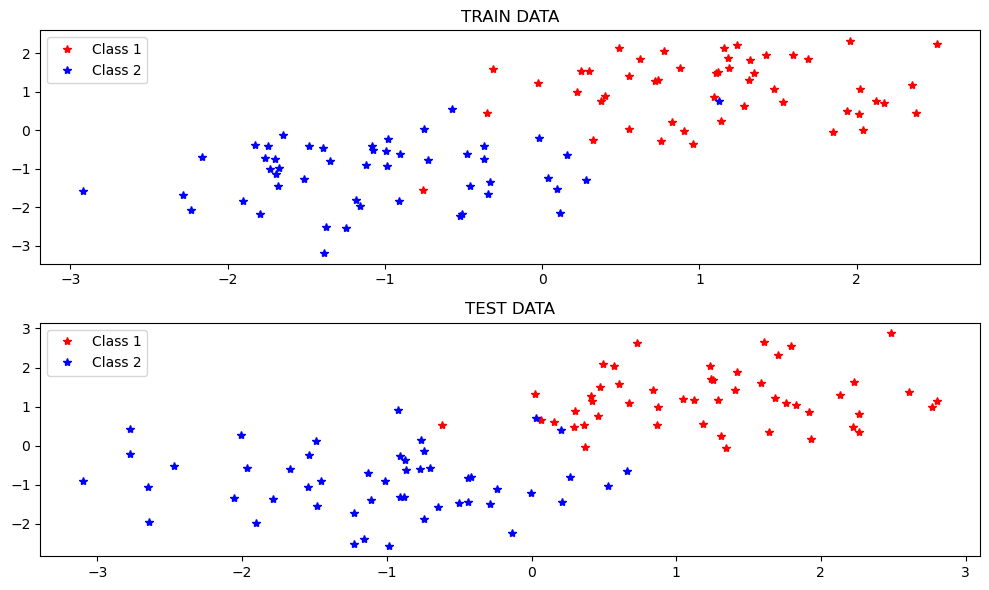

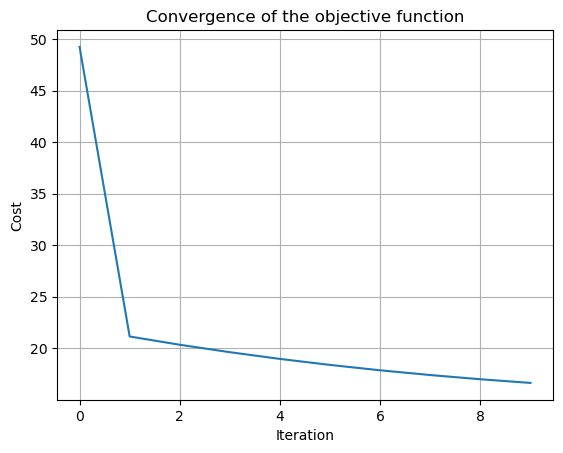

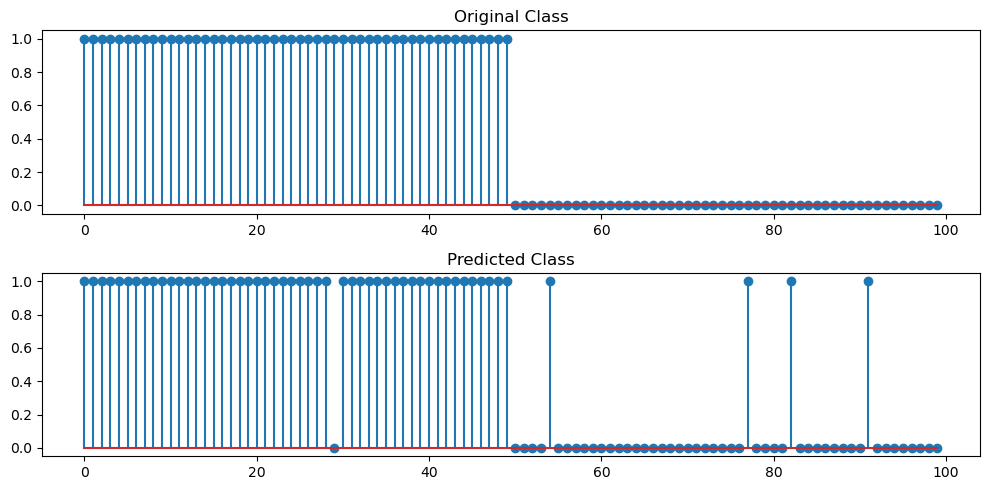

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation for Class 1
M1 = np.array([1, 1])
CX1 = np.array([[0.6, 0.1], [0.1, 0.6]])
eigvals1, E1 = np.linalg.eigh(CX1)
X = np.random.randn(2, 100)
X1 = E1 @ np.diag(np.sqrt(eigvals1)) @ X + M1[:, np.newaxis]

# Data Generation for Class 2
M2 = np.array([-1, -1])
CX2 = np.array([[0.7, 0.1], [0.1, 0.7]])
eigvals2, E2 = np.linalg.eigh(CX2)
X = np.random.randn(2, 100)
X2 = E2 @ np.diag(np.sqrt(eigvals2)) @ X + M2[:, np.newaxis]

# Labels for classifying
t = np.concatenate([np.ones(50), np.zeros(50)])

# Random selection of datapoints for dividing into training and testing
indices = np.random.permutation(100)

TRAINDATA1 = X1[:, indices[:50]]
TRAINDATA2 = X2[:, indices[:50]]
TESTDATA1 = X1[:, indices[50:]]
TESTDATA2 = X2[:, indices[50:]]

TRAINDATA = np.hstack((TRAINDATA1, TRAINDATA2))
TESTDATA = np.hstack((TESTDATA1, TESTDATA2))

# Plotting Train and Test Data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(TRAINDATA1[0, :], TRAINDATA1[1, :], 'r*', label='Class 1')
plt.plot(TRAINDATA2[0, :], TRAINDATA2[1, :], 'b*', label='Class 2')
plt.title('TRAIN DATA')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(TESTDATA1[0, :], TESTDATA1[1, :], 'r*', label='Class 1')
plt.plot(TESTDATA2[0, :], TESTDATA2[1, :], 'b*', label='Class 2')
plt.title('TEST DATA')
plt.legend()
plt.tight_layout()
plt.savefig("Log_Reg1")

# Logistic Regression
w = np.random.rand(4)#Weights matrix randomly assigned initially(guess)
COL = []#Matrix to Capture the negative log-likelihood function to understand convergence
lc = 0.1#Learning Rate Defined

for iteration in range(10):
    ytrain = []
    for i in range(100):
        x1 = TRAINDATA[0, i]
        x2 = TRAINDATA[1, i]
        z = w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1*x2
        ytrain.append(1 / (1 + np.exp(-z)))
    ytrain = np.array(ytrain)
    
    J = np.sum(t * np.log(ytrain) + (1 - t) * np.log(1 - ytrain))
    COL.append(-J)

    s = np.zeros(4)
    for i in range(100):
        x1 = TRAINDATA[0, i]
        x2 = TRAINDATA[1, i]
        xi = np.array([1, x1, x2, x1 * x2])
        s += (ytrain[i] - t[i]) * xi

    w -= lc * s

# Test phase
ytest = []
for i in range(100):
    x1 = TESTDATA[0, i]
    x2 = TESTDATA[1, i]
    z = w[0] + w[1]*x1 + w[2]*x2 + w[3]*x1*x2
    ytest.append(1 / (1 + np.exp(-z)))

ytest = np.round(ytest)
print(np.vstack((t, ytest)))

# Plotting convergence of the cost function
plt.figure()
plt.plot(COL)
plt.title('Convergence of the objective function')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.savefig("Log_Reg2")

# Accuracy
accuracy = np.mean(t == ytest) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Stem plots
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.stem(t)
plt.title('Original Class')
 
plt.subplot(2, 1, 2)
plt.stem(ytest)
plt.title('Predicted Class')
plt.tight_layout()
plt.savefig("Log_Reg3")